In [9]:
import numpy as np 
import pandas as pd

Data Preprocessing Techniques :
1) Data Cleaning -> Data imputation , Feature Scaling
2) Feature Transformation --> Polynomail Features, Discretization, Handling Categorical features, Custom Transformers, Composite Transformers
3) Feature Selection --> Filter based, Wrapper based
4) Feature Extraction --> PCA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# FEATURE EXTRACTION

DictVectorizer

In [11]:
data = [
    {'age': 4, 'height': 96.0},
    {'age':1, 'height': 73.9},
    {'age':3, 'height': 88.9},
    {'age':2, 'height': 81.6}
]

In [12]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
print(data_transformed)

[[ 4.  96. ]
 [ 1.  73.9]
 [ 3.  88.9]
 [ 2.  81.6]]


In [13]:
data_transformed.shape

(4, 2)

# DATA IMPUTATION

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
df = pd.read_csv('train.csv')

In [16]:
df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [19]:
df.isnull().sum().sum()

np.int64(6533)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [22]:
df['NumAntivirusProductsInstalled'].unique()

array([ 1.,  2.,  3.,  4., nan,  5.])

In [23]:
df.replace('nan',np.nan, inplace=True)

In [25]:
# add_indicator = False : this is a default choice that only impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df)
imputed_df = imputer.transform(df)
print(imputed_df.shape)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'f541bae429089117c4aac39c90dd3416'

In [26]:
#add_indicator = True: adds additional col for each col containing missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
imputer = imputer.fit(df)
imputed_df_with_indicator = imputer.transform(df)
print(imputed_df_with_indicator.shape)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'f541bae429089117c4aac39c90dd3416'

# FEATURE SCALING

hume dekhna hai , mean aur std deviation ka difference , percentile ka difference , usse analyse krna hai ki , konse columns
ko scaling ki jarurt hai .
feature scaling se hum outliers ka dhyan rkh skte hia , sabko ek scale par la skte hai
methods of scaling
1) Normalization
2) MaxAbsoluteScaler
3) MinMaxScaler
4) Standardization


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IsBetaUser,100000.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
RealTimeProtectionState,99934.0,6.848430e+00,1.015166e+00,0.0,7.0,7.0,7.000000e+00,8.000000e+00
IsPassiveModeEnabled,100000.0,1.762000e-02,1.315664e-01,0.0,0.0,0.0,0.000000e+00,1.000000e+00
AntivirusConfigID,99924.0,4.797571e+04,1.380332e+04,39.0,49480.0,53447.0,5.344700e+04,7.049000e+04
NumAntivirusProductsInstalled,99924.0,1.326528e+00,5.206814e-01,1.0,1.0,1.0,2.000000e+00,5.000000e+00
NumAntivirusProductsEnabled,99924.0,1.018264e+00,1.552909e-01,0.0,1.0,1.0,1.000000e+00,4.000000e+00
HasTpm,100000.0,9.967800e-01,5.665389e-02,0.0,1.0,1.0,1.000000e+00,1.000000e+00
CountryID,100000.0,1.080788e+02,6.306215e+01,1.0,51.0,97.0,1.620000e+02,2.220000e+02
CityID,99377.0,8.102994e+04,4.894403e+04,7.0,36694.0,82373.0,1.228350e+05,1.679570e+05
GeoRegionID,100000.0,1.697416e+02,8.918893e+01,1.0,89.0,181.0,2.670000e+02,2.960000e+02


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principal component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

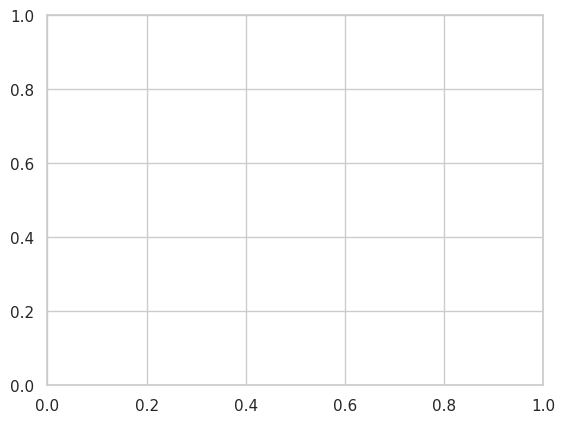

In [30]:
stf = df.plot.kde()